# Introduction
In this section introduce your method. Describe conceptually the problem it solves. Summarize the relevant literature, citing your sources.

# Econometric Framework
In this section develop the econometric setting in which your method applies. Define your notation, model, and assumptions. Mathematical notation in this environment is similar to Latex: $y_i=x_i'\beta+\varepsilon_i$.

# Simulations

A model to illustrate Elastic Net via Monte Carlo simulations is a multiple regression with dependent variable y, independent variables comprising x, unknown parameters comprising $\beta$, and an error term $\varepsilon$<br />
$y_i=x_i'\beta+\varepsilon_i$ <br />
For the purposes of Monte Carlo simulation, values for y will be calculated using known parameters of $\beta$ that are as follows: <br />
$\beta = (10, 10, 5, 5, 1, ._{98}., 1, 0, ._{394}., 0)^T$ <br />
The number of predictors and number of observations are as follows: <br />
$p = 500$ <br />
$n = 200$ <br />
Predictors will be correlated as follows: <br />
$Cov(X)_{ij} = (0.7)^{|i-j|}$ <br />
The means of the multivariate normal distribution from which X will be sampled are all 0. The error term follows a normal distribution with a mean of 0 and a variance of 1.
This model provides a series of problems for normal (OLS) estimation. First, the number of predictors is high and many of those predictors have no effect on y. Second, the predictors are correlated with each-other. <br />
To solve these problems, LASSO can do variable selection to reduce the problems involved with a high number of noisy predictors, and Ridge can reduce the penalties of multicollinearity with variable shrinkage. Elastic Net allows us to gain some of the advantages of both.

In [7]:
import numpy
import math
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm


numpy.random.seed(12)
def xxCov(a, b):
    return math.pow(0.7, abs(a-b))
n = 200
p = 500
A = range(1, p + 1)
B = range(1, p + 1)
r = numpy.zeros((len(A),len(B)))
for i in range(len(A)):
    for j in range(len(B)):
        r[i,j] = xxCov(A[i], B[j])

beta = [10, 10, 5, 5]
beta.extend(numpy.ones(100))
beta.extend(numpy.zeros(p - len(beta)))
runs = 100

mseEl = []
mseReg = []
bCoefs = []
lambdas = [.9, 1]
for i in range(0, runs):
    x = numpy.random.multivariate_normal([0] * p, r, n)
    y = []
    for j in range(0, n):
        y.append(sum([a*b for a,b in zip(beta,x[j])]) + sum(numpy.random.normal(0, 1, 1)))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)    
    mseElParts = []
    bParts = []
    
    reg = ElasticNetCV(alphas=numpy.arange(0.01, 0.1, 0.01), cv=5, fit_intercept=True, l1_ratio=0)
    reg.fit(x_train, y_train)
    mseElParts.append(numpy.mean((y_test - reg.predict(x_test)) ** 2))
    bParts.append(reg.coef_)
    
    for j in lambdas:
        reg = ElasticNetCV(cv=5, fit_intercept=True, l1_ratio=j)
        reg.fit(x_train, y_train)
        mseElParts.append(numpy.mean((y_test - reg.predict(x_test)) ** 2))
        bParts.append(reg.coef_)
        
        
    mseEl.append(mseElParts)
    x_train = sm.add_constant(x_train)
    x_test = sm.add_constant(x_test)
    ols = sm.OLS(y_train, x_train)
    results = ols.fit()
    bParts.append(results.params)
    bCoefs.append(bParts)
    mseReg.append(numpy.mean((y_test - results.predict(x_test)) ** 2))
    print i,

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


Mean and Standard Deviation for MSE of Ridge Regression
Mean: 221.92111811129854 Standard Deviation: 53.7774189042728 

Mean and Standard Deviation for MSE of Elastic Net with lambda of 0.9
Mean: 26.836244126281716 Standard Deviation: 10.518996635510035 

Mean and Standard Deviation for MSE of LASSO Regression
Mean: 31.979416753952087 Standard Deviation: 11.289221942052153 

Mean and Standard Deviation for OLS
Mean: 223.25917909821635 Standard Deviation: 52.427523700104466


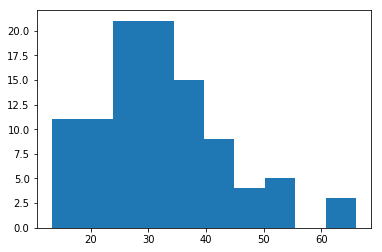

[ 3.01570696e-01  5.16073566e+00  5.29595571e+00  4.54566650e+00
  3.73344197e+00  2.33915679e+00  1.10912867e+00  1.64942179e-01
  5.66978893e-01  5.02936159e-01  3.72593968e-01  4.13067674e-01
  1.38917184e-01  1.05593377e+00  1.60864510e+00  8.75741488e-01
  8.54481925e-01  3.58712046e-01  1.16416842e+00  1.32603301e+00
  3.12255591e-01  8.94554662e-01  7.16298500e-01  9.93606973e-01
  7.90308087e-01  7.87746166e-01  5.50422005e-01  4.85153338e-01
  1.05364886e+00  3.56816512e-01  6.65605417e-01  1.45812355e+00
  1.32692411e+00  6.86509734e-02  6.34037305e-01 -4.33473335e-02
  4.57418220e-01  9.28118649e-01  6.75360150e-01  8.33400939e-01
  3.48396394e-01  7.79775391e-01  7.40120513e-01  8.79937184e-01
  5.74282768e-01  3.69832482e-01  7.04757925e-01  1.10851534e+00
  8.74348481e-01  1.67790618e+00  7.26682159e-01  7.73384443e-01
  6.25094214e-01  5.40410693e-01  8.45416654e-01  7.04551435e-01
  1.14179163e+00  1.20461380e+00  1.02313110e+00  2.05419691e-01
  7.36458949e-01  1.15741

In [12]:
print "Mean and Standard Deviation for MSE of Ridge Regression"
print "Mean:", numpy.mean([item[0] for item in mseEl]), "Standard Deviation:", numpy.std([item[0] for item in mseEl]), "\n"
for i in range(0, len(lambdas) - 1):
    print "Mean and Standard Deviation for MSE of Elastic Net with lambda of", lambdas[i]
    print "Mean:", numpy.mean([item[i + 1] for item in mseEl]), "Standard Deviation:", numpy.std([item[i + 1] for item in mseEl]), "\n"
print "Mean and Standard Deviation for MSE of LASSO Regression"
print "Mean:", numpy.mean([item[len(lambdas)] for item in mseEl]), "Standard Deviation:", numpy.std([item[len(lambdas)] for item in mseEl]), "\n"
print "Mean and Standard Deviation for OLS"
print "Mean:", numpy.mean(mseReg), "Standard Deviation:", numpy.std(mseReg)
import matplotlib.pyplot as plt
plt.hist([item[len(lambdas)] for item in mseEl])
plt.show()
print bCoefs[1][3]

# Empirical Example
In this section give relevant background information on the empirical example you have chosen.
## Description of the Data and Setting
Show summary statistics and graphs of your data. 

In [ ]:
# Include the code which loads the data, displays summary statistics and graphs right here.

## Results

In [ ]:
# include code that implements your method and reports the results.

Do not forget to discuss and interpret your results.

# Conclusion
Summarize what you have taught us in this section.